In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [15]:
df=pd.read_csv('/content/Train.csv')
df1=pd.read_csv('/content/Test.csv')

In [16]:
df.shape

(8523, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7814,FDB36,5.465,Regular,0.048626,Baking Goods,129.2626,OUT045,2002,NaN,Tier 2,Supermarket Type1,1311.6260
6044,NCM06,7.475,Low Fat,0.126753,Household,154.2656,OUT010,1998,NaN,Tier 3,Grocery Store,308.9312
2600,FDZ03,13.650,Regular,0.131873,Dairy,188.0240,OUT010,1998,NaN,Tier 3,Grocery Store,745.6960
69,NCI17,8.645,Low Fat,0.143423,Health and Hygiene,95.8410,OUT046,1997,Small,Tier 1,Supermarket Type1,2027.3610
757,FDD50,18.850,Low Fat,0.141642,Canned,168.1132,OUT046,1997,Small,Tier 1,Supermarket Type1,2874.9244
4090,NCV42,6.260,Low Fat,0.052594,Household,111.0228,OUT010,1998,NaN,Tier 3,Grocery Store,221.0456
8146,FDB21,7.475,Low Fat,0.149361,Fruits and Vegetables,243.4854,OUT017,2007,NaN,Tier 2,Supermarket Type1,1691.7978
6202,FDH10,21.000,Low Fat,0.049382,Snack Foods,193.0478,OUT049,1999,Medium,Tier 1,Supermarket Type1,1549.9824
517,DRD37,9.800,Low Fat,0.013898,Soft Drinks,46.5060,OUT018,2009,Medium,Tier 3,Supermarket Type2,372.8480
8395,FDG21,17.350,Regular,0.000000,Seafood,150.2050,OUT045,2002,NaN,Tier 2,Supermarket Type1,5992.2000


In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
df['Item_Weight'].median()

12.6

In [22]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [23]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [24]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Size'].unique()

array([1, 0, 2])

In [34]:
df.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [35]:
df.shape

(8523, 10)

<ipython-input-36-e4082827e7d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


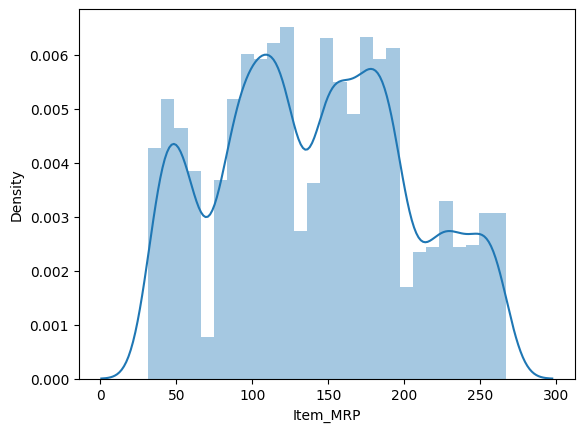

In [36]:
sns.distplot(df['Item_MRP'])
plt.show()

<ipython-input-37-49e03bd6b08e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


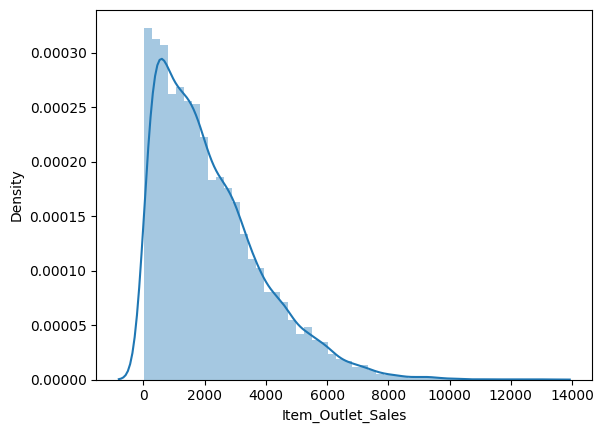

In [37]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

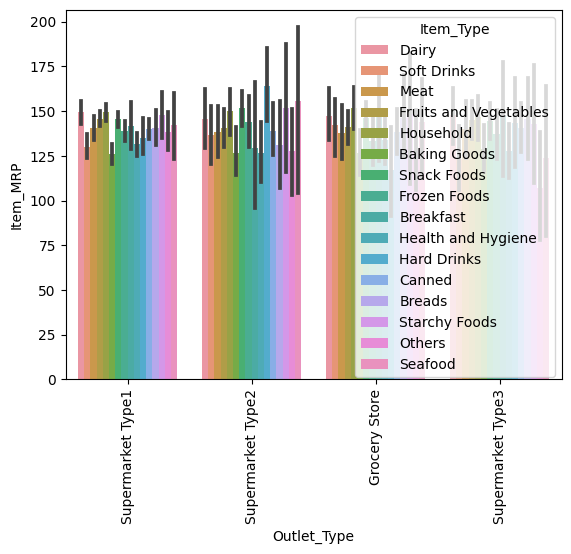

In [40]:
sns.barplot(x='Outlet_Type',y='Item_MRP',hue='Item_Type',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

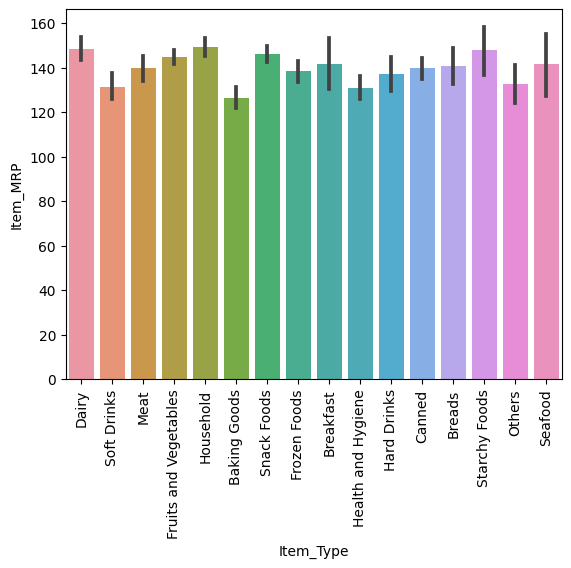

In [42]:
sns.barplot(x='Item_Type',y='Item_MRP',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

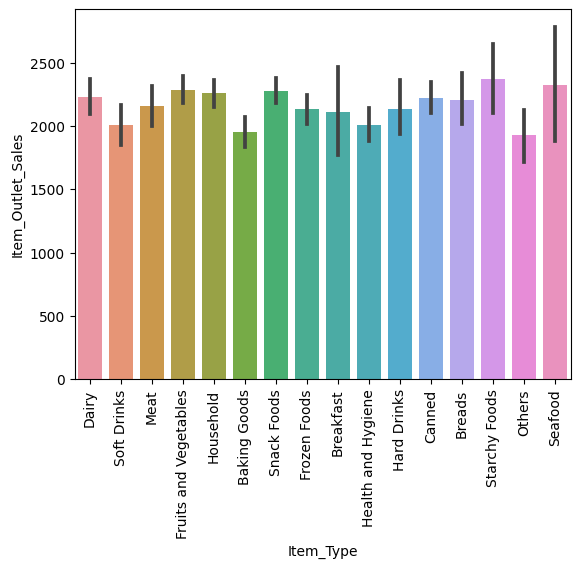

In [43]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

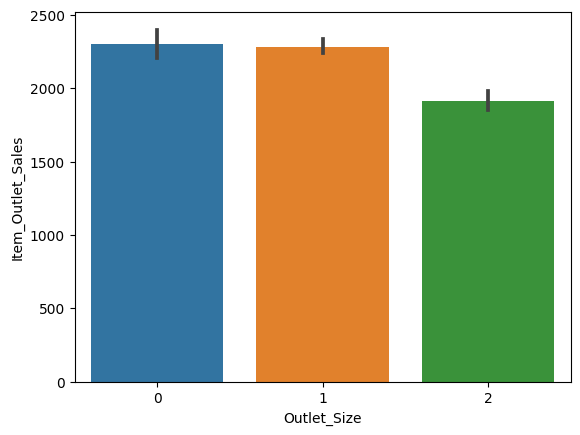

In [47]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

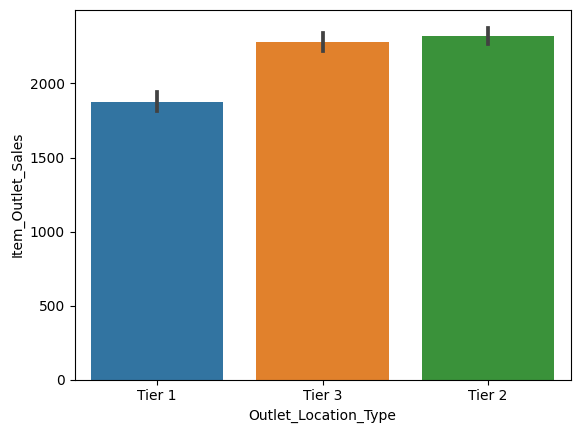

In [48]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

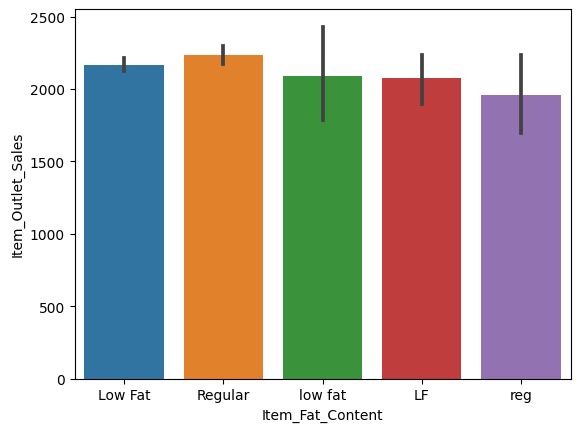

In [49]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_MRP'>

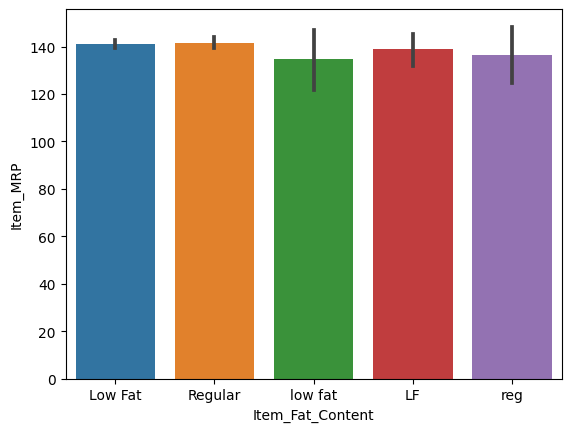

In [50]:
sns.barplot(x='Item_Fat_Content',y='Item_MRP',data=df)

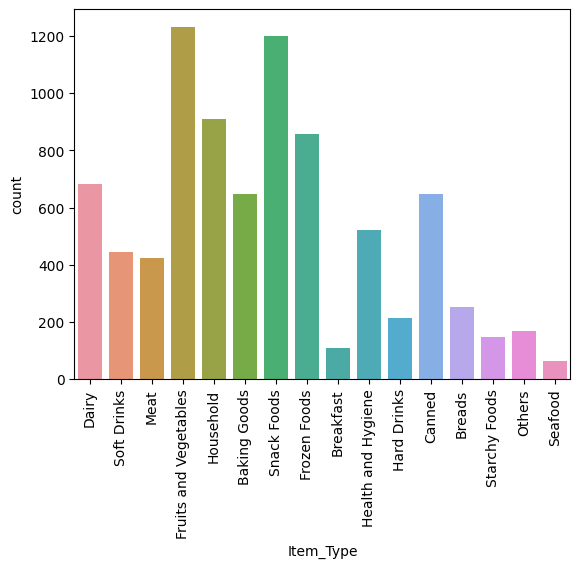

In [53]:
sns.countplot(x='Item_Type',data=df)
plt.xticks(rotation=90)
plt.show()

Correlation

<ipython-input-55-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

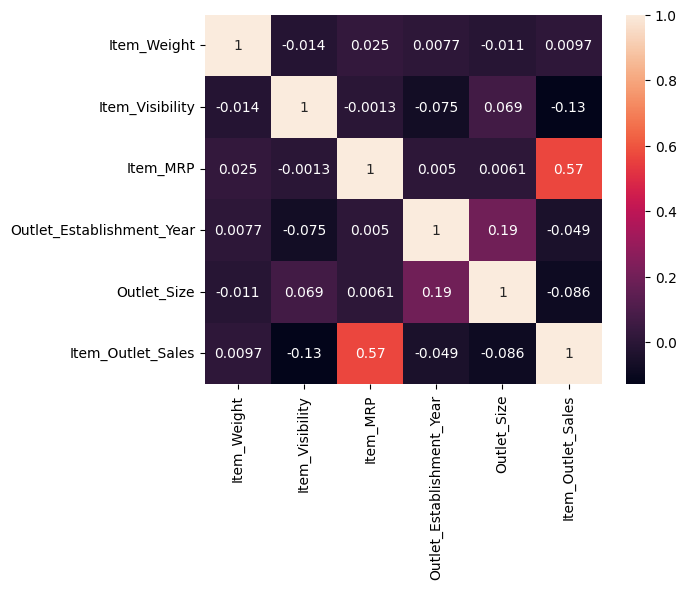

In [55]:
sns.heatmap(df.corr(),annot=True)

FEATURE ENGINEERING

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 666.0+ KB


In [59]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Fat_Content'].unique()

array([1, 2, 3, 0, 4])

In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [60]:
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])

In [61]:
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])

In [63]:
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int64  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int64  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int64  
 6   Outlet_Location_Type  8523 non-null   int64  
 7   Outlet_Type           8523 non-null   int64  
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 599.4 KB


Split features and Target

In [71]:
X=df.drop(columns=['Item_Outlet_Sales'],axis=1)

In [68]:
Y=df['Item_Outlet_Sales']

Test Train Split

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

Model Training

XGBoost Regressor

In [73]:
regressor = XGBRegressor()

In [74]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Model Evaluation

In [75]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [76]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [77]:
print('R Squared value = ', r2_train)

R Squared value =  0.8524484732021826


In [78]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [79]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [80]:
print('R Squared value = ', r2_test)

R Squared value =  0.5434056984656357
